### Machine Learning project

#### Objective
The goal of this project is to explore the tecniques learned in the Data Analyst Nanodegree course related to machine learning. We are going to build a classifier around the dataset from Enron, this dataset presents emails and financial statements that belongs to former employers, mostly senior managers. We will be focused more in the financial data.

#### Introduction
Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. It was founded in 1985 because of a merger between Houston Natural Gas and InterNorth, both relatively small regional companies. Before its bankruptcy on December 2, 2001, Enron employed approximately 20,000 staff and was one of the world's major electricity, natural gas, communications and pulp and paper companies, with claimed revenues of nearly $101 billion during 2000. Fortune named Enron "America's Most Innovative Company" for six consecutive years.

At the end of 2001, it was revealed that its reported financial condition was sustained by institutionalized, systematic, and creatively planned accounting fraud, known since as the Enron scandal. Enron has since become a well-known example of willful corporate fraud and corruption. The scandal also brought into question the accounting practices and activities of many corporations in the United States and was a factor in the enactment of the Sarbanes–Oxley Act of 2002. The scandal also affected the greater business world by causing the dissolution of the Arthur Andersen accounting firm.

Enron filed for bankruptcy in the Southern District of New York in late 2001 and selected Weil, Gotshal & Manges as its bankruptcy counsel. It ended its bankruptcy during November 2004, pursuant to a court-approved plan of reorganization. A new board of directors changed the name of Enron to Enron Creditors Recovery Corp., and emphasized reorganizing and liquidating certain operations and assets of the pre-bankruptcy Enron. On September 7, 2006, Enron sold Prisma Energy International Inc., its last remaining business, to Ashmore Energy International Ltd. (now AEI). (https://en.wikipedia.org/wiki/Enron)

On wikipedia you can find the list below, it names some of the most important people in the company and it is highly possible that you are going to see these names during the analyses. That is because some of them were classified as person of interest during the investigations.

Corporate Leadership and Central Management
- Kenneth Lay: Chairman, and Chief executive officer
- Jeffrey Skilling: President, Chief operating officer, and CEO (February–August 2001)
- Andrew Fastow: Chief financial officer
- Richard Causey: Chief accounting officer
- Rebecca Mark-Jusbasche: CEO of Enron International and Azurix
- Lou Pai: CEO of Enron Energy Services
- Forrest Hoglund: CEO of Enron Oil and Gas
- Dennis Ulak: President of Enron Oil and Gas International
- Jeffrey Sherrick: President of Enron Global Exploration & Production Inc.
- Richard Gallagher: Head of Enron Wholesale Global International Group
- Kenneth "Ken" Rice: CEO of Enron Wholesale and Enron Broadband Services
- J. Clifford Baxter: CEO of Enron North America
- Sherron Watkins: Head of Enron Global Finance
- Jim Derrick: Enron General Counsel
- Mark Koenig: Head of Enron Investor Relations
- Joan Foley: Head of Enron Human Resources
- Richard Kinder: President and COO of Enron (1990-December 1996);
- Greg Whalley: President and COO of Enron (August 2001– Bankruptcy)
- Jeff McMahon: CFO of Enron (October 2001-Bankruptcy)

In this document we are going to apply some classification algorithms in the dataset to create a classifier that will be tested agains part of the data. The document is divided as follows: we start by doing some exploration in with the data and taking some statistics, that part is important so we can become familiar with the data. The next step is how we deal with ouliers. Than we start the part of selecting with features we are going to use and with features did we engineer to help us. After having the data ready, we selected three classifiers, tunned them and extracted some measurements that helped us define with classifier had the best results.

As stated in the project, we are not starting from zero, we already have the financial dataset in a pkl file that only needs to be loaded. Also a python script containing steps that we need to complete and other auxiliary functions like converting the dataset into numpy arrays ready to be used by sklearn. Our analysis is going to make usage of this file as a guideline. Also a test script that evaluates our classifier was provided and is going to be used in the end of our project.

### Data Exploration

We are going to start by loading the dataset and see if all the data points have all the features.

In [1]:
#Python version 2.7.13

#libraries imported
import sys

import pickle
#pickle.__version__ $Revision: 72223 
import pandas as pd
#pandas.__version__ 0.20.1 
import numpy as np
#numpy.__version__ 1.12.1
import seaborn as sns
#seaborn.__version__ 0.7.1 
%matplotlib inline
import matplotlib.pyplot as plt
#matplotlib version 2.0.2 
import math

#Methods from libraries
from sklearn.cross_validation import StratifiedShuffleSplit
#sklearn.__version__ 0.19.0
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#Methodos from local files
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import tester

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
### Store to my_dataset for easy export below.
my_dataset = data_dict

#Taking a look at the data
features_counter = {}
for each in my_dataset:
    for feature in my_dataset[each]:
        if feature in features_counter:
            features_counter[feature] += 1
        else:
            features_counter[feature] = 1
print(features_counter)
print(len(features_counter))

{'salary': 146, 'to_messages': 146, 'deferral_payments': 146, 'total_payments': 146, 'loan_advances': 146, 'bonus': 146, 'email_address': 146, 'restricted_stock_deferred': 146, 'total_stock_value': 146, 'shared_receipt_with_poi': 146, 'long_term_incentive': 146, 'exercised_stock_options': 146, 'from_messages': 146, 'other': 146, 'from_poi_to_this_person': 146, 'from_this_person_to_poi': 146, 'poi': 146, 'deferred_income': 146, 'expenses': 146, 'restricted_stock': 146, 'director_fees': 146}
21


We can see that we have 146 data points and all of them are represented by 21 features. Lets take a look at how the data is indexed.

In [3]:
for each in my_dataset:
    print(each)

METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HORTON STANLEY C
PIPER GREGORY F
HUMPHREY GENE E
UMANOFF ADAM S
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
MCCARTY DANNY J
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUC

From the indexes, we can notice that two data points are not persons, TOTAL and THE TRAVEL AGENCY IN THE PARK were also add to the dataset. Total can be considered an outlier because it is the sum of each variable but THE TRAVEL AGENCY IN THE PARK is not, even not being an outlier a data point that is not a person can be misleading to classifiers so it needs to be removed.

Lets take a look at the data:

In [4]:
db = pd.DataFrame.from_dict(my_dataset, orient='index')
#converting string "NaN" to nan
db = db.replace('NaN', np.nan)
db

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,...,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,NaN,2660303.0,NaN,False,NaN,-1386055.0,1586055.0,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,...,NaN,NaN,69.0,NaN,False,NaN,-201641.0,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818.0,NaN,684694.0,860136.0,1599641.0,NaN,NaN,NaN,NaN,1599641.0,...,NaN,NaN,874.0,NaN,False,NaN,NaN,93750.0,NaN,NaN
BECK SALLY W,231330.0,7315.0,NaN,969068.0,NaN,700000.0,126027.0,2639.0,NaN,126027.0,...,NaN,4343.0,566.0,386.0,False,NaN,NaN,NaN,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,NaN,1110705.0,...,NaN,484.0,210698.0,108.0,True,NaN,-2334434.0,NaN,tim.belden@enron.com,228.0
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,3285.0,NaN,NaN,NaN,44093.0,-44093.0,...,NaN,NaN,NaN,NaN,False,3285.0,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582.0,NaN,NaN,228474.0,1624396.0,NaN,869220.0,NaN,NaN,2493616.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


We have a lot of "NaN" in the data, when looking at the code that generated the data it is possible to observe that all "NaN" or "DASH" from the original pdf file were converted to 0 when loaded. Lets see how many valid data points we have:

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

In [6]:
print(db.isnull().sum().sum())
print(db.count().sum())

1358
1708


A lot of data points are "NaN", and locking at the PDF where the data come from it was a dash(-). In class it was stated that this values are not defined. Since I could not find in any place what this dash(-) means, I am going to consider that it is zero for variables that are numerical and missing data for variables that are non numerical. That decision was based on the fact that we can not remove any data point because we have very few data and we have a lot of "NaN", if we remove a data point because of a "NaN" we could end with no data.

In [7]:
#Removing TOTAL
db = db.drop("TOTAL")
db = db.drop("THE TRAVEL AGENCY IN THE PARK")
db

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,...,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,NaN,2660303.0,NaN,False,NaN,-1386055.0,1586055.0,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,...,NaN,NaN,69.0,NaN,False,NaN,-201641.0,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818.0,NaN,684694.0,860136.0,1599641.0,NaN,NaN,NaN,NaN,1599641.0,...,NaN,NaN,874.0,NaN,False,NaN,NaN,93750.0,NaN,NaN
BECK SALLY W,231330.0,7315.0,NaN,969068.0,NaN,700000.0,126027.0,2639.0,NaN,126027.0,...,NaN,4343.0,566.0,386.0,False,NaN,NaN,NaN,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,NaN,1110705.0,...,NaN,484.0,210698.0,108.0,True,NaN,-2334434.0,NaN,tim.belden@enron.com,228.0
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,3285.0,NaN,NaN,NaN,44093.0,-44093.0,...,NaN,NaN,NaN,NaN,False,3285.0,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582.0,NaN,NaN,228474.0,1624396.0,NaN,869220.0,NaN,NaN,2493616.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


In [8]:
db.poi.value_counts()

False    126
True      18
Name: poi, dtype: int64

Counting how many times poi is one gives how many POIs we have, 18, against 126 non POIs, that is a very uneven dataset.
Now we are going to explore each variable and its distribution. The idea here is to compare the features agains the feature "poi". Doing this we are going to aquire a larger understanding about the data, have a notion on how the outliers are going to influence and see with variables we can use in our classifiers.

#### salary

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


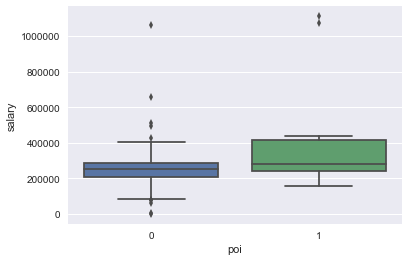

In [9]:
#Converting poi to int
db.poi = db.poi.astype(int)
sns.boxplot(db["salary"], groupby = db["poi"])

Salary is a good feature to use in our classifier. 95 attribute pointes have the feature and we can see that on average POIs have a large salary than non POIs.

#### to_messages

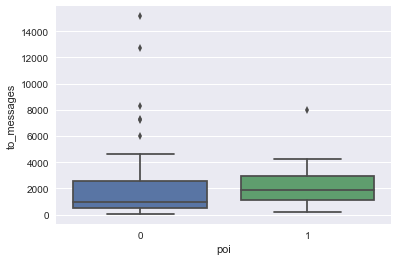

In [10]:
sns.boxplot(db["to_messages"], groupby = db["poi"])

to_messages can be used in our classifier. We have 86 attribute points that have this feature and on average POIs have a larger value.

#### deferral_payments

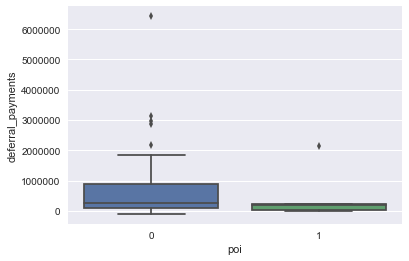

In [11]:
sns.boxplot(db["deferral_payments"], groupby = db["poi"])

We have a lot of data points that does not have this feature, to be precisely only 39 have it.Since we have so few data, this variable is not going to be used for classification

#### total_payments

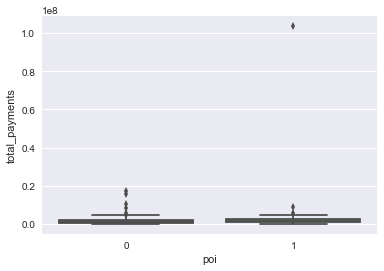

In [12]:
sns.boxplot(db["total_payments"], groupby = db["poi"])

Total payments has a valid data point that since to be an outlier.

LAY KENNETH L


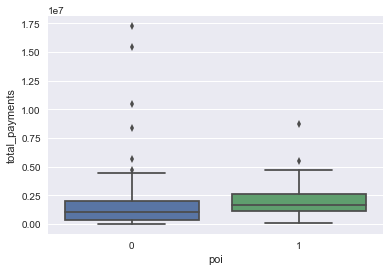

In [13]:
total_payments = db[["total_payments","poi"]]
#Printing the outlier and removing it to plot the char again
print(total_payments["total_payments"].idxmax())
total_payments = total_payments.drop(total_payments["total_payments"].idxmax()) 
sns.boxplot(total_payments["total_payments"], groupby = total_payments["poi"])

The outlier value belongs to LAY KENNETH L. Is not surprise that LAY have received more payment than the others because he is the chairman and CEO of Enron. This variable is going to be used in our classifiers.

#### exercised_stock_options

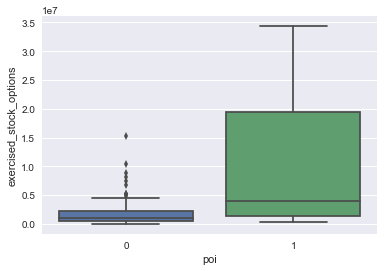

In [14]:
sns.boxplot(db["exercised_stock_options"], groupby = db["poi"])

It appears that we have a large difference between POI and non POI for this variable. We are going to use exercised_stock_options in our classifier.

#### bonus

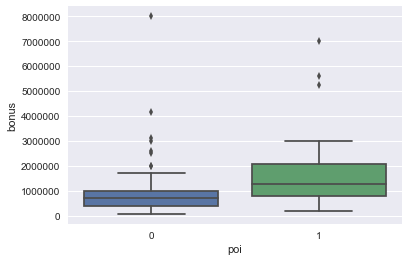

In [15]:
sns.boxplot(db["bonus"], groupby = db["poi"])

Bonus has the same pattern as the other monetary attributes, POIs are larger than non POIs.

#### restricted_stock

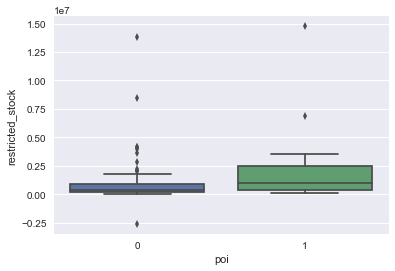

In [16]:
sns.boxplot(db["restricted_stock"], groupby = db["poi"])

Restricted_stock is going to be used.

#### shared_receipt_with_poi

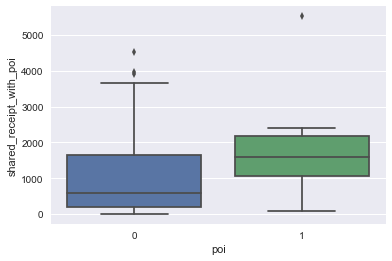

In [17]:
sns.boxplot(db["shared_receipt_with_poi"], groupby = db["poi"])

This since to be a good variable if you take in consideration the chances of a person that have shared a receipt with a POI be a POI.

#### restricted_stock_deferred

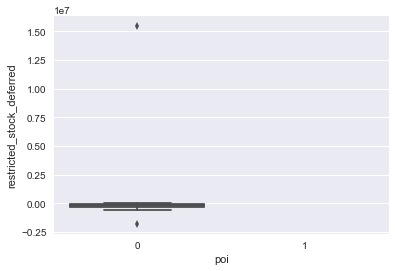

In [18]:
sns.boxplot(db["restricted_stock_deferred"], groupby = db["poi"])

Very few data points have this feature, we are going to discart it.

#### total_stock_value

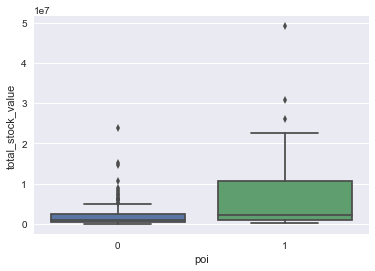

In [19]:
sns.boxplot(db["total_stock_value"], groupby = db["poi"])

Same idea as the other monetary variables. This variable is going to be used in the classifier.

#### expenses

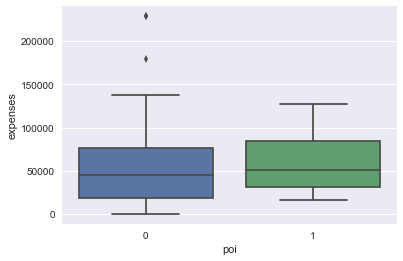

In [20]:
sns.boxplot(db["expenses"], groupby = db["poi"])

The data here does not seen to present a difference between POIs and non POIs. It may not influence the classification but we are still going to use it because we also going to use methods to select the best features.

#### loan_advances

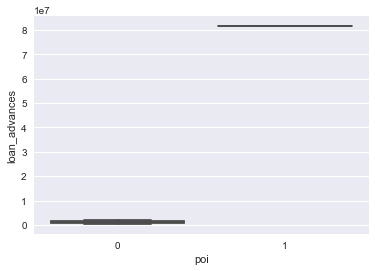

In [21]:
sns.boxplot(db["loan_advances"], groupby = db["poi"])

Only 4 data points, we are not going to use this feature.

#### from_messages

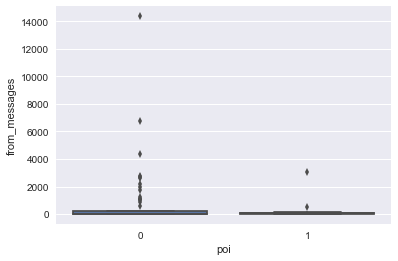

In [22]:
sns.boxplot(db["from_messages"], groupby = db["poi"])

A lot os outliers in this distribution, lets remove one to see if it helps.

KAMINSKI WINCENTY J


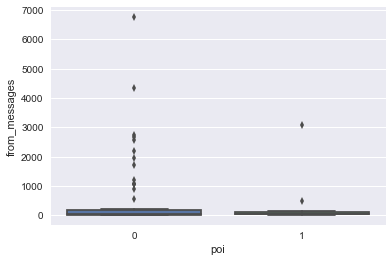

In [23]:
from_messages = db[["from_messages","poi"]]

#print outlier
print(from_messages["from_messages"].idxmax())
from_messages = from_messages.drop(from_messages["from_messages"].idxmax()) 
sns.boxplot(from_messages["from_messages"], groupby = from_messages["poi"])

The distribution is still getting affected by outliers. Lets leave that way, it appears that non POIs sent more messages than POIs. This feature can be used with from_this_person_to_poi so we can compute a ratio that is going to tell the percentage of emails each person sent to POI.

#### other

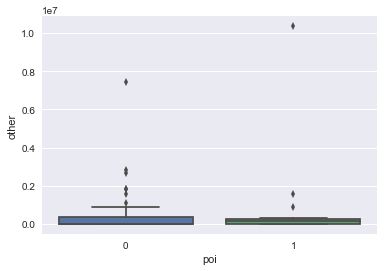

In [24]:
sns.boxplot(db["other"], groupby = db["poi"])

LAY KENNETH L


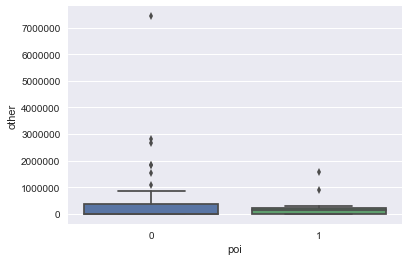

In [25]:
plt.figure()
other = db[["other","poi"]]
print(other["other"].idxmax())
other = other.drop(other["other"].idxmax()) 
sns.boxplot(other["other"], groupby = other["poi"])

This variable also presents a difference between POI and non POIs. We are going to use it on our classifier.

#### from_this_person_to_poi

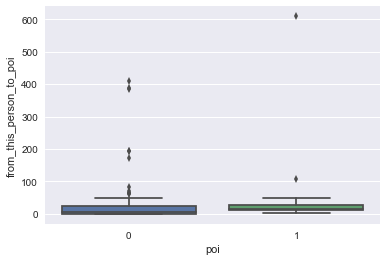

In [26]:
sns.boxplot(db["from_this_person_to_poi"], groupby = db["poi"])

from_this_person_to_poi is important because it can tell us if a POI sends more messages do POIs. It also going to be used.

#### director_fees

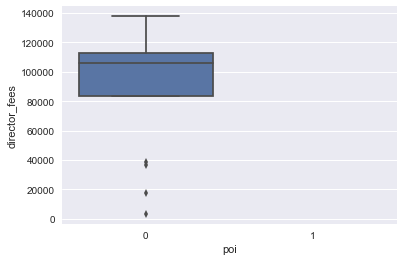

In [27]:
sns.boxplot(db["director_fees"], groupby = db["poi"])

We are not going to use director_fees because it has only 17 data points.

#### deferred_income

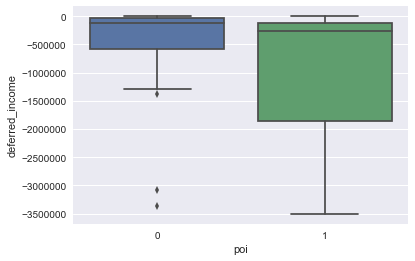

In [28]:
sns.boxplot(db["deferred_income"], groupby = db["poi"])

We are not going to use deferred_income because it has only 49 data points.

#### long_term_incentive

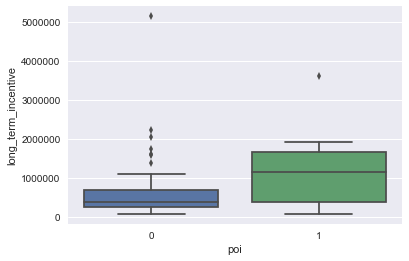

In [29]:
sns.boxplot(db["long_term_incentive"], groupby = db["poi"])

long_term_incentive are going to be used in out classifier.

#### from_poi_to_this_person

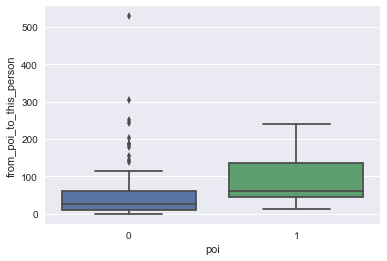

In [30]:
sns.boxplot(db["from_poi_to_this_person"], groupby = db["poi"])

From_poi_to_this_person can indicate if a person that receives a lot of emails from POI can be considerad a POI itself. This variable is going to be used in our classifier.

#### Removing outilier
It was identified two outliers that have to be removed, they are "TOTAL" and "THE TRAVEL AGENCY IN THE PARK". These outliers are evident because they are not people that worked in the company. The analysis of the data indicated that there are employers that are outliers, like what happens in total_payments from LAY KENNETH L. Lets count how many times each data point is an outlier.

The formula that we are going to use is:   
  IQR = Q3 - Q1   
  Q1 - 1.5×IQR > outlier > Q3 + 1.5×IQR

In [31]:
db = pd.DataFrame.from_dict(my_dataset, orient='index')
features_list = ['poi','salary','to_messages', 'bonus', 'shared_receipt_with_poi', 'long_term_incentive', 'exercised_stock_options',
                'from_messages', 'other', 'from_poi_to_this_person', 'from_this_person_to_poi', 
                'expenses', 'restricted_stock', 'total_payments', 'total_stock_value']
db = db[features_list]
db = db.replace('NaN', np.nan)
outliers = db.quantile(.75) + 1.5 * (db.quantile(.75)-db.quantile(.25))
outliers_db = pd.DataFrame((db[1:] > outliers[1:]).sum(axis = 1), columns = ['# of outliers']).\
    sort_values('# of outliers',  ascending = [0])
outliers_db.head(10)

,# of outliers
TOTAL,9
LAY KENNETH L,8
BELDEN TIMOTHY N,7
LAVORATO JOHN J,7
FREVERT MARK A,7
WHALLEY LAWRENCE G,7
SKILLING JEFFREY K,6
BAXTER JOHN C,5
KITCHEN LOUISE,5
KEAN STEVEN J,4


In [32]:
print my_dataset["TOTAL"]["poi"]
print my_dataset["LAY KENNETH L"]["poi"]
print my_dataset["BELDEN TIMOTHY N"]["poi"]
print my_dataset["LAVORATO JOHN J"]["poi"]
print my_dataset["FREVERT MARK A"]["poi"]
print my_dataset["WHALLEY LAWRENCE G"]["poi"]
print my_dataset["SKILLING JEFFREY K"]["poi"]

False
True
True
False
False
False
True


We are going to remove from the dataset data points that are not POI and also were considered outliers more than 6 times only. The first condition is because we are considering that most of the POI are outliers, that can be inferred from the graphs in the Data Exploration section. The second condition is because of the size of the dataset that is small.

In [33]:
### Task 2: Remove outliers
my_dataset.pop("TOTAL")
my_dataset.pop("THE TRAVEL AGENCY IN THE PARK")
my_dataset.pop("LAVORATO JOHN J")
my_dataset.pop("FREVERT MARK A")
my_dataset.pop("WHALLEY LAWRENCE G")

{'bonus': 3000000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'greg.whalley@enron.com',
 'exercised_stock_options': 3282960,
 'expenses': 57838,
 'from_messages': 556,
 'from_poi_to_this_person': 186,
 'from_this_person_to_poi': 24,
 'loan_advances': 'NaN',
 'long_term_incentive': 808346,
 'other': 301026,
 'poi': False,
 'restricted_stock': 2796177,
 'restricted_stock_deferred': 'NaN',
 'salary': 510364,
 'shared_receipt_with_poi': 3920,
 'to_messages': 6019,
 'total_payments': 4677574,
 'total_stock_value': 6079137}

#### Engineering features

I am going to engineer three variables, the first one is going to be the rate between the number of messages sent to POI and the number of messages sent, the second is the rate between messages received from POI and number of messages received. This two variables can explicity show the percentage of messages received or sent to POI, better than a random number that we do no the relation between the amount total number of messages.
The third variable engineered is the rate between bonus and salary, this variable can tell us the employers that were more privileged with the bonus.

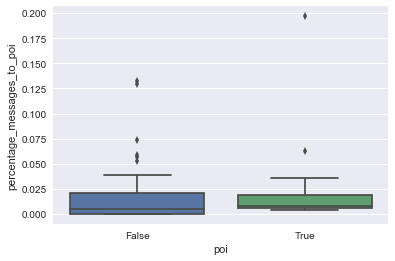

In [34]:
### Task 3: Create new feature(s)

#Engineering features
db.percentage_messages_to_poi = db.from_this_person_to_poi / db.to_messages
db.percentage_messages_from_poi = db.from_poi_to_this_person / db.from_messages
db.rate_bonus_by_salary = db.bonus / db.salary
db["percentage_messages_to_poi"] = db.percentage_messages_to_poi
db["percentage_messages_from_poi"] = db.percentage_messages_from_poi
db["rate_bonus_by_salary"] = db.rate_bonus_by_salary

sns.boxplot(db["percentage_messages_to_poi"], groupby = db["poi"])

We can see that there is no big difference between the number of messages sent to poi and the total number of messages sent.

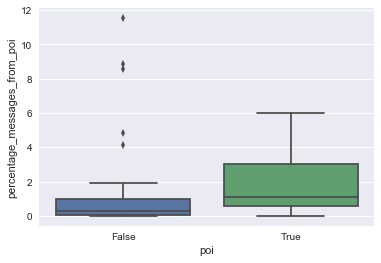

In [35]:
sns.boxplot(db["percentage_messages_from_poi"], groupby = db["poi"])

Also when analysing the rate between the number of messages received from POI and the total number of messages received, we can see that there is no big difference between POIs and non POIs.

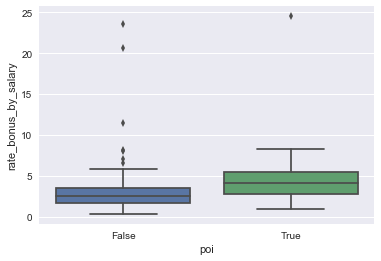

In [36]:
sns.boxplot(db["rate_bonus_by_salary"], groupby = db["poi"])

rate_bonus_by_salary tell us that POIs received larger bonus in proportion to their salaries.

#### Features selection
In this section we are going to create the features that we spoke about and feed the feature list with the features we stablished that we are going to use.

We decided to remove from our analises features that have few data points because zeros also are information. A classifier can be miss guided to classify POIs or non POIs based on this information.

In [37]:
#Creating feature and adding them to the my_dataset
for each in my_dataset:
    aux = float(my_dataset[each]["from_this_person_to_poi"]) / float(my_dataset[each]["to_messages"])
    if ((aux == 0) or (math.isnan(aux))):
        aux = "NaN"
    my_dataset[each]["percentage_messages_to_poi"] = str(aux)
    
    aux = float(my_dataset[each]["from_poi_to_this_person"]) / float(my_dataset[each]["from_messages"])
    if ((aux == 0) or (math.isnan(aux))):
        aux = "NaN"
    my_dataset[each]["percentage_messages_from_poi"] = str(aux)
    
    aux = float(my_dataset[each]["bonus"]) / float(my_dataset[each]["salary"])
    if ((aux == 0) or (math.isnan(aux))):
        aux = "NaN"
    my_dataset[each]["rate_bonus_by_salary"] = str(aux)

#Setting feature list, it contains the engineered features and also the features selected in above.
features_list = ['poi','salary', 'percentage_messages_to_poi', 'percentage_messages_from_poi', 'rate_bonus_by_salary',
                'to_messages', 'bonus', 'shared_receipt_with_poi', 'long_term_incentive', 'exercised_stock_options',
                'from_messages', 'other', 'from_poi_to_this_person', 'from_this_person_to_poi', 
                'expenses', 'restricted_stock', 'total_payments', 'total_stock_value']

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

The process of selecting the best features does not end here, during the Algorithm section, we are going to use SelectKBest to select the best features that we are going to be using in the process of tunning the algorithms.

#### Spliting dataset between training and test set
We are going to split 30% of the dataset to validation and leave the other 70% to training. This percentage was selected because the dataset is small and the number of POI and non POI is not balanced, so 30% allows to have a test set with some POI in it.

Also we are going to use cross valition. We are going to divide the dataset multiple times, still following the 30%, and use diverse combinations of validation and training set samples to classification.

In an ideal world, we would split our data into training data used for selection of your algorithm and parameter settings, and a test set to assess how well the fit model generalizes to new data. Typically, that training data is split into further parts in order to derive an optimal parameter setting. One part is a training set that is used to fit models and the other part is a validation set to compute performance. By splitting data in this way, we can try many parameter combinations on the training set to find one that we believe will generalize best to novel data points. And by withholding a test set completely from the full training process (training and validation sets), we get an idea of this generalizability, since the test set data is truly novel for the fit model. There is always the possibility that in our model-fitting process, that we are hanging too closely to the unique properties of the training and validation sets rather than the common signal that underlies all three partitions: training, validation, and test.

Of course, this is the ideal case. If we have plenty of data available, then we can consider this three disjoint set approach relatively easily. But if our available data is decreased, then we may not have enough information to satisfactorily divide the data in the simple matter above. We run a higher risk of having spurious associations selected by our model if we are unlucky with the way that the training set is selected. To get around this, instead of just one training set and one validation set, we perform multiple splits on the training data and have multiple training sets and multiple validation sets to decide on our final model parameters.
This splitting of the training data into multiple training-validation splits rather than a single train-validation split is cross validation. The idea behind this is that the parameter set that has the best overall performance across all of the training-validation splits should have the best chance of generalizability, since that parameter set has demonstrated a capability of maintaining good performance even if the training data changes.

In [38]:
#Spliting the data between validation and training set. These datasets are going to be used only in the introduction of
#each algorithm. We are still using cross validation for training, selecting the best features and test.
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=0)

#### Validation metrics

In this project we are going to use accuracy, recall, precision and f1 score as metrics.

Accuracy is the sum of true positives with true negatives divided by the number of predictions.
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.

The validation is going to be performed by the code below. It is the same code used by teste.py. It first perform cross validation in the dataset using StratifiedShuffleSplit folding the dataset 1000 times, each time it folds, the algorithm is trained and validated. The predictions from the validation are used to compute the validation metrics.

In [39]:
#Strings to output the results
PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000, pipeline = 0):
    #format the features in the way sklear uses 
    data = featureFormat(dataset, feature_list, sort_keys = True)
    
    #Split data in labels and features
    labels, features = targetFeatureSplit(data)
    
    #Shuffle the dataset, it returs the indexes for each split
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    
    #Organize the features and labels train and test datasets.
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    aux_features_list = []
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        features_train = [features[ii] for ii in train_idx]
        features_test = [features[ii] for ii in test_idx]
        labels_train = [labels[ii] for ii in train_idx]
        labels_test = [labels[ii] for ii in test_idx]
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        
        if pipeline:
            indexes = clf.named_steps['Select_Features'].get_support(indices=True)
            aux_features_list = ["poi"]
            for index in indexes:
                aux_features_list.append(features_list[index + 1])
        
        # Count the results
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    
    # Compute the results
    total_predictions = true_negatives + false_negatives + false_positives + true_positives
    accuracy = 1.0*(true_positives + true_negatives)/total_predictions
    precision = 1.0*true_positives/(true_positives+false_positives)
    recall = 1.0*true_positives/(true_positives+false_negatives)
    f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
    f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
    
    # output results
    print clf
    print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
    print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
    print ""
    if pipeline:
        print(aux_features_list)

### Algorithms

In this section we are going to experiment with some algorithms to find the classifier and combination of parameters that best predicts the POI.
The algorithms that I am going to try are:
- gaussian naive bayes
- SVM
- Decision Tree
- Ada Boost

#### Gaussian naive bayes

We are going to start with Gaussian naive bayes, the first test is going to use defaut values.

In [40]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
#clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
#from sklearn.cross_validation import train_test_split
#features_train, features_test, labels_train, labels_test = \
#    train_test_split(features, labels, test_size=0.3, random_state=42)

#from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
#validate(pred, labels_test)

test_classifier(clf, my_dataset, features_list)

GaussianNB(priors=None)
	Accuracy: 0.82793	Precision: 0.37065	Recall: 0.29300	F1: 0.32728	F2: 0.30581
	Total predictions: 14000	True positives:  586	False positives:  995	False negatives: 1414	True negatives: 11005



Selecting k best variables, we are going to do a test here, we are going to iterate from 2 to the max number of features that is 17. We are doing that by using a pipeline and GridSearchCV.

In sklearn, the GridSearchCV class is a convenient way of pulling off this form of parameter selection. When fed training data, it will perform multiple training-validation splits and fit a selected algorithm or pipeline to these splits, selecting a parameter set that has the best overall performance on the validation sets. By default, GridSearchCV performs 3-fold cross-validation, but we can also set different cross-validation or scoring functions.

Pipeline of transforms with a final estimator.
Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’, as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting to None.

In [90]:
folds = 100
fs = SelectKBest(f_classif)

clf = GaussianNB()
cv = StratifiedShuffleSplit(labels, folds, test_size=0.3, random_state = 42)
pipe= Pipeline([('Select_Features',fs),('SVC',clf)])

params = dict(\
    Select_Features__k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

#setting GridSearchCV to use f1 score as metric.
clf_Grid = GridSearchCV(pipe, param_grid = params, cv=cv, scoring='f1')
clf_Grid.fit(features, labels)
print("Best estimator fond by grid search:")
print clf_Grid.best_estimator_
print('Best Params found by grid search:')
print clf_Grid.best_params_
print('Best Score found by grid search:')
print clf_Grid.best_score_

grid_scores = clf_Grid.grid_scores_

Best estimator fond by grid search:
Pipeline(memory=None,
     steps=[('Select_Features', SelectKBest(k=6, score_func=<function f_classif at 0x000000000D485198>)), ('SVC', GaussianNB(priors=None))])
Best Params found by grid search:
{'Select_Features__k': 6}
Best Score found by grid search:
0.36598021423


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [76]:
#Function that converts grid_score to dataframe
def grid_scores_to_df(grid_scores):
    """
    Convert a sklearn.grid_search.GridSearchCV.grid_scores_ attribute to a tidy
    pandas DataFrame where each row is a hyperparameter-fold combinatination.
    """
    rows = list()
    for grid_score in grid_scores:
        for fold, score in enumerate(grid_score.cv_validation_scores):
            row = grid_score.parameters.copy()
            row['fold'] = fold
            row['score'] = score
            rows.append(row)
    df = pd.DataFrame(rows)
    return df

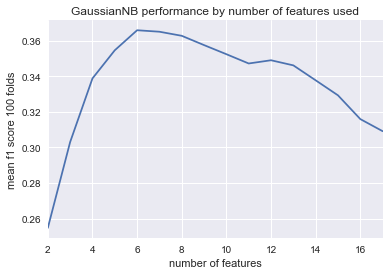

In [91]:
#Ploting mean f1 score
df = grid_scores_to_df(grid_scores)
df = df.groupby(['Select_Features__k'])['score'].mean()
ax = df.plot(title = "GaussianNB performance by number of features used")
ax.set_xlabel("number of features")
ax.set_ylabel("mean f1 score 100 folds")

The best f1 score for gaussian NB is 0.3659 when using 6 features. From the chart GaussianNB performance by number of features used we can observe how f1 score evolved for each number of features. Now that we have the best parameters and amount of features, we are going to validade using 1000 folds with cross validation.

In [42]:
# Setting clf as GaussianNB, configuring the pipeline with SelectKBest to select the 6 k best variables and testing the
# classifier.
clf = GaussianNB()
pipe= Pipeline([('Select_Features',SelectKBest(f_classif, k = 6)),('SVC',clf)])

test_classifier(pipe, my_dataset, features_list, pipeline = 1)

Pipeline(memory=None,
     steps=[('Select_Features', SelectKBest(k=6, score_func=<function f_classif at 0x000000000D485198>)), ('SVC', GaussianNB(priors=None))])
	Accuracy: 0.84350	Precision: 0.44727	Recall: 0.40500	F1: 0.42509	F2: 0.41280
	Total predictions: 14000	True positives:  810	False positives: 1001	False negatives: 1190	True negatives: 10999

['poi', 'salary', 'rate_bonus_by_salary', 'bonus', 'shared_receipt_with_poi', 'exercised_stock_options', 'total_stock_value']


Our best naive bayes classifier has an accuracy of 0.84350, precision of 0.44727, recall 0.40500 and f1 equals to 0.42509

Features selected:
- salary
- rate_bonus_by_salary
- bonus
- shared_receipt_with_poi
- exercised_stock_options
- total_stock_value

#### SVM

SVM is an algorithm that depends on the scale that the data is inserted, that is because it tries to maximize the margin, the distance from each data point to the line that classifies the data. Since we are dealing with data that are not in the same scale, for example we have money and number of emails in the feature list, we need to scale the features. We are going to scale the features using MinMaxScaler.

##### Scalling the data
MinMaxScaler estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.
The transformation is given by:

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

SVM has parameters that allows us to tune the algorithm, we could try a combination of parameters one by one but we can also use GridSearchCV to do all at once. The parameters that we are going to tune are kernel and C.

C : float, optional (default=1.0)
Penalty parameter C of the error term. Higher C means that the classifier is going to go in favor of getting the correct classification instead of the lowest margin.

kernel : string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

Once the features that we use in our classifier also affects the parameters we choose while tuning the algorithm, we are going to perform both operations together. We are going to use GridSearchCV to select what is the best combinations of parameters and we also are going to use SelectKBest to define the best combination of features for SVM.

In [82]:
folds = 10
fs = SelectKBest(f_classif)
clf_SCV = SVC()
scaler = MinMaxScaler()

# Folding the dataset 10 times with 30% test and 70% train.
cv = StratifiedShuffleSplit(labels, folds, test_size=0.3, random_state = 42)
# Configuring pipeline to scale the features using MinMaxScaler, select the best combination of features and perform SVM.
pipe= Pipeline([('Scale_Features',scaler),('Select_Features',fs),('SVC',clf_SCV)])

# Parameters for SVM and features selection
Cs=[1, 10, 100, 1000, 10000, 100000]
kernel = ('linear', 'poly', 'rbf', 'sigmoid')
params = dict(\
    Select_Features__k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],\
    SVC__kernel=kernel,\
    SVC__C=Cs,\
    SVC__gamma=[0,0.0001,0.0005, 0.001, 0.005, 0.01, 0.1])

#Run classifier selecting the best f1 score
clf_Grid_SVM = GridSearchCV(pipe, param_grid = params, cv=cv, scoring='f1')
clf_Grid_SVM.fit(features, labels)
print("Best estimator fond by grid search:")
print clf_Grid_SVM.best_estimator_
print('Best Params found by grid search:')
print clf_Grid_SVM.best_params_
print('Best Score found by grid search:')
print clf_Grid_SVM.best_score_

grid_scores = clf_Grid_SVM.grid_scores_

Best estimator fond by grid search:
Pipeline(memory=None,
     steps=[('Scale_Features', MinMaxScaler(copy=True, feature_range=(0, 1))), ('Select_Features', SelectKBest(k=17, score_func=<function f_classif at 0x000000000D485198>)), ('SVC', SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
Best Params found by grid search:
{'SVC__gamma': 0.1, 'SVC__kernel': 'sigmoid', 'SVC__C': 100000, 'Select_Features__k': 17}
Best Score found by grid search:
0.406562049062


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


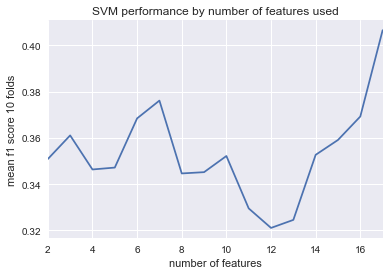

In [89]:
#Plotting mean f1 score for SVM
df = grid_scores_to_df(grid_scores)
df = df.loc[(df.SVC__C == 100000) & (df.SVC__gamma == 0.1) & (df.SVC__kernel == "sigmoid")]
df = df.groupby(['Select_Features__k'])['score'].mean()
ax = df.plot(title = "SVM performance by number of features used")
ax.set_xlabel("number of features")
ax.set_ylabel("mean f1 score 10 folds")

The graph above, SVM performance by number of features used is how the classifier performed using C equals 100000, kernel equals to sigmoid and gamma equals 0.1.
Ok, now that we have the best combination of parameters and features we are going to fold the algorithm 1000 times to validate it.

In [44]:
clf_svm = SVC(gamma = 0.1, kernel = "sigmoid", C = 100000)
#constructing pipeline
pipe= Pipeline([('Scale_Features',scaler), ('Select_Features',SelectKBest(f_classif, k = 17)),('SVC',clf_svm)])

test_classifier(pipe, my_dataset, features_list, pipeline = 1)

Pipeline(memory=None,
     steps=[('Scale_Features', MinMaxScaler(copy=True, feature_range=(0, 1))), ('Select_Features', SelectKBest(k=17, score_func=<function f_classif at 0x000000000D485198>)), ('SVC', SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.80071	Precision: 0.31297	Recall: 0.33050	F1: 0.32150	F2: 0.32684
	Total predictions: 14000	True positives:  661	False positives: 1451	False negatives: 1339	True negatives: 10549

['poi', 'salary', 'percentage_messages_to_poi', 'percentage_messages_from_poi', 'rate_bonus_by_salary', 'to_messages', 'bonus', 'shared_receipt_with_poi', 'long_term_incentive', 'exercised_stock_options', 'from_messages', 'other', 'from_poi_to_this_person', 'from_this_person_to_poi', 'expenses', 'restricted_stock', 'total_payments', 'total_stock_value']


Our best SVM classifier is with gamma equals 0.1, kernel sigmoid, C equals 100000 and K 17. When folding it 1000 times we encounter a F1 score of 0.32150 with recall of 0.33050 and precision of 0.31297. 

#### Decision Tree

Running decision tree classifier with default parameters.

In [45]:
# Splitting train and test data
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

clf = tree.DecisionTreeClassifier(random_state = 0)
clf.fit(features_train, labels_train)

# Printing feature importance, the features that most contributed to the results 
feature_importances = clf.feature_importances_
print("Feature importance:")
print("")
for index, each in enumerate(feature_importances):
    if(each > 0):
        print("{:s} : {:f}".format(features_list[index + 1], each))

test_classifier(clf, my_dataset, features_list)

Feature importance:

salary : 0.030481
percentage_messages_to_poi : 0.044077
percentage_messages_from_poi : 0.063307
rate_bonus_by_salary : 0.166182
bonus : 0.278721
long_term_incentive : 0.113953
exercised_stock_options : 0.089363
expenses : 0.142693
total_payments : 0.071221
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
	Accuracy: 0.82121	Precision: 0.35369	Recall: 0.30400	F1: 0.32697	F2: 0.31279
	Total predictions: 14000	True positives:  608	False positives: 1111	False negatives: 1392	True negatives: 10889



Using gridsearch on max_depth and min_samples_split and also selecting the best k variables.

In [93]:
#the dataset is going to be folded 100 times.
folds = 100
fs = SelectKBest(f_classif)

clf_tree = tree.DecisionTreeClassifier(random_state = 0)
cv = StratifiedShuffleSplit(labels, folds, test_size=0.3, random_state = 42)

#Constructing pipeline
pipe= Pipeline([('Select_Features',fs),('tree',clf_tree)])

#Setting parameters to be tested
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
params = dict(\
    Select_Features__k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],\
    tree__max_depth=max_depth,\
    tree__min_samples_split=min_samples_split,\
    tree__splitter = ['best', 'random'],\
    tree__criterion = ['gini', 'entropy'],\
    tree__max_features = ['auto'])

#Running the classifier agains all combinations of parameters above and selecting the best based on f1 score.
clf_Grid_tree = GridSearchCV(pipe, param_grid = params, cv=cv, scoring='f1')
clf_Grid_tree.fit(features, labels)
print("Best estimator fond by grid search:")
print clf_Grid_tree.best_estimator_
print('Best Params found by grid search:')
print clf_Grid_tree.best_params_
print('Best Score found by grid search:')
print clf_Grid_tree.best_score_

grid_scores = clf_Grid_tree.grid_scores_

Best estimator fond by grid search:
Pipeline(memory=None,
     steps=[('Select_Features', SelectKBest(k=11, score_func=<function f_classif at 0x000000000D485198>)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])
Best Params found by grid search:
{'tree__criterion': 'entropy', 'tree__splitter': 'best', 'tree__min_samples_split': 3, 'tree__max_features': 'auto', 'tree__max_depth': 8, 'Select_Features__k': 11}
Best Score found by grid search:
0.340841797092


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


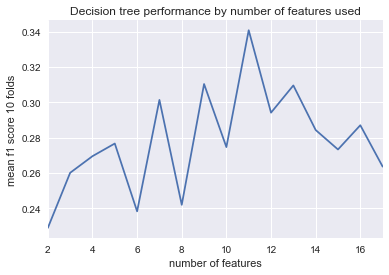

In [101]:
#Plotting mean f1 score for decision tree
df = grid_scores_to_df(grid_scores)
df = df.loc[(df.tree__criterion == "entropy") & (df.tree__min_samples_split == 3) & (df.tree__splitter == "best") 
             & (df.tree__max_depth == 8)]
df = df.groupby(['Select_Features__k'])['score'].mean()
ax = df.plot(title = "Decision tree performance by number of features used")
ax.set_xlabel("number of features")
ax.set_ylabel("mean f1 score 100 folds")

The parameters that give us the best decision tree classifier when using F1 as metric are: criterion eguals to entropy, spitter equals best, min sample split equals 3, max features equals to auto and max depth equals to 8. Also the best results are yielded using 11 features(k equals to 11), this can also be seen on chart Decision tree performance by number of features used.

In [48]:
#testing the classifier folding it 1000 times with the parameters that where found before.
clf_tree = tree.DecisionTreeClassifier(random_state = 0, min_samples_split=3, max_depth=8, 
                                      criterion = "entropy", splitter = "best", max_features = "auto")
pipe= Pipeline([('Select_Features',SelectKBest(f_classif, k = 11)),('SVC', clf_tree)])

test_classifier(pipe, my_dataset, features_list, pipeline = 1)

Pipeline(memory=None,
     steps=[('Select_Features', SelectKBest(k=11, score_func=<function f_classif at 0x000000000D485198>)), ('SVC', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])
	Accuracy: 0.83200	Precision: 0.40068	Recall: 0.35500	F1: 0.37646	F2: 0.36328
	Total predictions: 14000	True positives:  710	False positives: 1062	False negatives: 1290	True negatives: 10938

['poi', 'salary', 'rate_bonus_by_salary', 'bonus', 'shared_receipt_with_poi', 'long_term_incentive', 'exercised_stock_options', 'from_poi_to_this_person', 'expenses', 'restricted_stock', 'total_payments', 'total_stock_value']


The best results for Decision Tree are f1 score equals 0.37646, Recall of 0.35500 and Precision of 0.40068.

#### Ada Boost
Running ada boost with base estimator being a Decision Tree Classifier and default parameters.

In [49]:
#Testing Ada Boost classifier with decision tree as base estimator and default parameters
DTC = tree.DecisionTreeClassifier()
clf = AdaBoostClassifier(base_estimator = DTC, random_state = 0)
test_classifier(clf, my_dataset, features_list)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=0)
	Accuracy: 0.82157	Precision: 0.35836	Recall: 0.31500	F1: 0.33528	F2: 0.32281
	Total predictions: 14000	True positives:  630	False positives: 1128	False negatives: 1370	True negatives: 10872



Without any tunning we have a f1 score of 0.33528, precision of 0.35836 and recall of 0.31500. Lets do a grid search over some parameters and also select the best number of features to see if we can improve this results.

In [102]:
#Building pipeline with select k best features and ada boost classifier with decision tree as base estimator
folds = 10
fs = SelectKBest(f_classif)
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(base_estimator = DTC, random_state = 0)
cv = StratifiedShuffleSplit(labels, folds, test_size=0.3, random_state = 42)
pipe= Pipeline([('Select_Features',fs),('ABC', ABC)])

#pipeline parameters
params = dict(\
    Select_Features__k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],\
    ABC__n_estimators = [1, 5, 10, 100])

#Running pipeline with all combination of parameters possible and selecting the best based on f1 score.
clf_Grid = GridSearchCV(pipe, param_grid = params, cv=cv, scoring='f1')
clf_Grid.fit(features, labels)
print("Best estimator fond by grid search:")
print clf_Grid.best_estimator_
print('Best Params found by grid search:')
print clf_Grid.best_params_
print('Best Score found by grid search:')
print clf_Grid.best_score_

grid_scores = clf_Grid.grid_scores_

Best estimator fond by grid search:
Pipeline(memory=None,
     steps=[('Select_Features', SelectKBest(k=9, score_func=<function f_classif at 0x000000000D485198>)), ('ABC', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None...e=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1, random_state=0))])
Best Params found by grid search:
{'Select_Features__k': 9, 'ABC__n_estimators': 1}
Best Score found by grid search:
0.398232323232


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


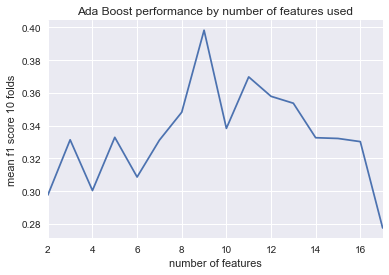

In [104]:
#Plotting mean f1 score for Ada Boost
df = grid_scores_to_df(grid_scores)
df = df.loc[(df.ABC__n_estimators == 1)]
df = df.groupby(['Select_Features__k'])['score'].mean()
ax = df.plot(title = "Ada Boost performance by number of features used")
ax.set_xlabel("number of features")
ax.set_ylabel("mean f1 score 10 folds")

The graph Ada Boost performance by number of features used gives the mean f1 score for each combination of features tested. The best we can get is when using 9 features and n estimators equals to 1, when using this parameters we have a f1 score of 0.3982. Now lets do a more robust test folding the dataset 1000 times.

In [51]:
# Building pipeline with the best parameters found previously
DTC = DecisionTreeClassifier(random_state = 0, criterion = "entropy", splitter = "random")
clf = AdaBoostClassifier(base_estimator = DTC, random_state = 0, n_estimators = 1)
pipe= Pipeline([('Select_Features',SelectKBest(f_classif, k = 9)),('SVC', clf)])
test_classifier(pipe, my_dataset, features_list, pipeline = 1)

Pipeline(memory=None,
     steps=[('Select_Features', SelectKBest(k=9, score_func=<function f_classif at 0x000000000D485198>)), ('SVC', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=N...te=0,
            splitter='random'),
          learning_rate=1.0, n_estimators=1, random_state=0))])
	Accuracy: 0.80150	Precision: 0.30860	Recall: 0.31400	F1: 0.31128	F2: 0.31290
	Total predictions: 14000	True positives:  628	False positives: 1407	False negatives: 1372	True negatives: 10593

['poi', 'salary', 'rate_bonus_by_salary', 'bonus', 'shared_receipt_with_poi', 'long_term_incentive', 'exercised_stock_options', 'from_poi_to_this_person', 'total_payments', 'total_stock_value']


F1 score is lower than before, f1 equals to 0.31128. That may be because before we are only folding the dataset 10 times, and the times we folded we had a good distribution of POIs and non POIs. When folding it 1000 times we are achiving a more realistic score.

### Results

Table 1: Results

| Algorithm | avg accuracy   |  avg precision  |  avg recall  |  avg f1 score  |
|------|------|------|------|------|------|
|  Naive Bayes  |  0.84350  |  0.44727  |  0.40500  |  0.42509  |
|  SVM  |  0.80071  |  0.31297  |  0.33050  |  0.32150  |
|  Decision Three  |  0.83200  |  0.40068  |  0.35500  |  0.37646  |
|  AdaBoost  |  0.80150  |  0.30860  |  0.31400  |  0.31128  |

From the table above we can see that Naive Bayes is the algorithm that best classified the data between POI and non POI.

#### Usage of Evaluation Metrics
In this project we are going to use accuracy, recall, precision and f1 score as metrics. Explanations about each metric can be found on Validation metrics section.

My best classifier, that is Naive Bayes, showed precision 0.44727 and recall 0.40500 with the resulting F1 score 0.42509. I can explain it as 44.7% of the called POI are POI and 40.5% of POI are identified.

#### Validation Strategy

Validation strategy is how I am going to validade the models that I am using, it goes from the amount of data reserved for training and test to metrics that I decided to use.

The performance of the final model is measured by dividing the database between training and test base or by using cross validation. In this project we did both. First we divided the database between training and test, 70% of the data was training and 30% was test. The next step was using the training set we compute the best combination of parameters and features and evaluated it using the test set. After that fase was completed, we used cross validation to test the combination of parameters and features in different combinations of the dataset. We did use StratifiedShuffleSplit because it allows us to split the data following a percentage, it was the same 70% for training and 30% for test.
The combination 70/30 was choosen because the dataset is small and the percentage of POI is not 50/50. Seventy percent for training allow us to have a good number of features to train our models and 30% allow us to have a fair amount of POIs in the test set.

We also used the test_classifer to test our algorithms, in this case the strategy was set to default parameter of StratifiedShuffleSplit. From the documentation:

test_size : float, int, None, optional

If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. By default, the value is set to 0.1. It will remain 0.1 only if train_size is unspecified, otherwise it will complement the specified train_size.

train_size : float, int, or None, default is None

If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

That means we are using 10% for test and 90% for training. That may be the explanation way some algorithms presented worst performance when testing using this function. Since the proportion os POIs and non POIs is not proportional, when using only 10% for test the chances of having foldings that are not balanced are higher.

Regarding the metrics, accuracy is the sum of how many POIs were predicted as POIs and how many non POIs were predicted as non POIs divided by the amount of predictions, in other words is how many times the classifier is correct. This metric is not very good because we have an uneven database. We are interrested in creating a classifier that corrects predicts the POIs and non POIs, but since we have 87.5% of the data as non POIs, a classifier that predicts everything as non POIs already going to have a accuracy of 0.875.

Because of that we are also using precision, recall and f1 score. Precision and recall are metrics that take in consideration the false negatives and false positives. Precision is going to be the number of POIs that were predicted as POIs divided by the total number of predictions classified as POIs. That is going to give the ability of the classifier to not label POIs as non POIs. Recall is the ratio given by the number of POIs classified as POIs divided by the total number of POIs, this metric is going to give the ability of the classifier in finding all POIs.

The F1 score can be interpreted as a weighted average of the precision and recall.

#### Algorithm Performance
In this section we are going to call test_classifier from tester.py over our best classifier.

In [52]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
clf = GaussianNB()
pipe= Pipeline([('Select_Features',SelectKBest(f_classif, k = 6)),('SVC',clf)])

tester.dump_classifier_and_data(pipe, my_dataset, features_list)
tester.main()

Pipeline(memory=None,
     steps=[('Select_Features', SelectKBest(k=6, score_func=<function f_classif at 0x000000000D485198>)), ('SVC', GaussianNB(priors=None))])
	Accuracy: 0.84350	Precision: 0.44727	Recall: 0.40500	F1: 0.42509	F2: 0.41280
	Total predictions: 14000	True positives:  810	False positives: 1001	False negatives: 1190	True negatives: 10999



### Conclusions
The goal of the project was to apply the knowleog aquired in the machine learning course to a real dataset. The dataset choosed has some challengs that makes us use a variaty of tools and procedures to create classification algorithms that are able to distinguish between POI and non POIs.

The first step of the project was to look at the data and get familiar with it. In this process we were able to identifie problems like outliers and features in different scales. We were also able to pinpoint with variables we could use in our classifier by looking at its distribution and distinguishing between POI and non POI. During the process of training the classifiers, the size of the dataset and the amount of POIs were the biggest problems. We tried to minimize the problem related to the size of the dataset by using cross validation and the difference between the number of POIs and non POIs by dividing the dataset in 30% for validation and 70% for training.A lot of combinations of features and tunning parameters were tested automatically using grid search and each were validated mainly by f1 score.

One of the limitation of the project is the feature selection. Maybe the way we selected the features could be improved like by using PCA to reduce the dimensionality of the dataset. Another improvement is the number of outliers removed, we opted to remove only the first tree people that were not POI because the way the distribution presented themselves, we could observe that POIs are usally the outliers and removing the outliers that are not POI helped a lot the classifiers. Another option is to use classifiers that were not tested like Random Florest or Knn.

### References:
- Enron data set: https://www.cs.cmu.edu/~./enron/
- Enron on Wikipedia: https://en.wikipedia.org/wiki/Enron
- Sklearn: http://scikit-learn.org/stable/